<img style="margin: 2rem 0 0;" src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" width="20%" />

# Aula 09 - Seaborn
---

<img src="https://lc-public-assets.s3.sa-east-1.amazonaws.com/images/Logos/logoLcPng.webp" width="300px" style="position: absolute; top: 2.4rem; right: 20px; border-radius: 5px;" />

<div style="display: flex; justify-content: space-around">
<a href=https://seaborn.pydata.org/examples/scatterplot_matrix.html>
<img src="https://seaborn.pydata.org/_static/scatterplot_matrix_thumb.png" height="135" width="135">
</a>

<a href=https://seaborn.pydata.org/examples/errorband_lineplots.html>
<img src="https://seaborn.pydata.org/_static/errorband_lineplots_thumb.png" height="135" width="135">
</a>


<a href=https://seaborn.pydata.org/examples/many_facets.html>
<img src="https://seaborn.pydata.org/_static/many_facets_thumb.png" height="135" width="135">
</a>

<a href=https://seaborn.pydata.org/examples/structured_heatmap.html>
<img src="https://seaborn.pydata.org/_static/structured_heatmap_thumb.png" height="135" width="135">
</a>

<a href=https://seaborn.pydata.org/examples/horizontal_boxplot.html>
<img src="https://seaborn.pydata.org/_static/horizontal_boxplot_thumb.png" height="135" width="135">
</a>
</div>

<br>

[Seaborn](https://seaborn.pydata.org/) é uma biblioteca de visualização de dados Python baseada no Matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.

In [3]:
# Importação das Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Utilizando o dataset "tips"
df = sns.load_dataset('tips')

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [8]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [10]:
df['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [9]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [11]:
df.shape

(244, 7)

## Aplicando sobre gráficos que criamos com o Matplotlib

### Lineplot

In [ ]:
# No eixo x: o dia da semana (day)
# No eixo y: a média do total_bill

In [14]:
df['total_bill'].mean()

19.78594262295082

In [15]:
df['day']

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [21]:
df_agrupado_por_dia = df.groupby('day').mean().reset_index()

In [22]:
df_agrupado_por_dia

,day,total_bill,tip,size
0,Thur,17.682742,2.771452,2.451613
1,Fri,17.151579,2.734737,2.105263
2,Sat,20.441379,2.993103,2.517241
3,Sun,21.410000,3.255132,2.842105


In [23]:
df_agrupado_por_dia['day']

0    Thur
1     Fri
2     Sat
3     Sun
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

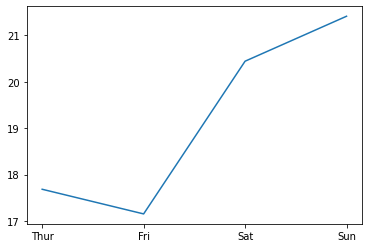

In [25]:
plt.plot(df_agrupado_por_dia['day'], df_agrupado_por_dia['total_bill']) # Gráfico de linha

In [26]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='total_bill'>

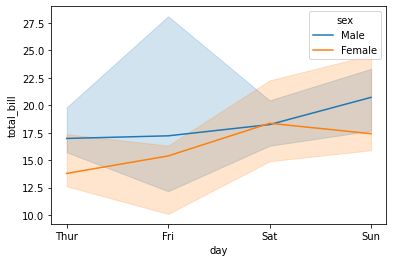

In [46]:
sns.lineplot(data=df, x='day', y='total_bill', estimator=np.median, hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

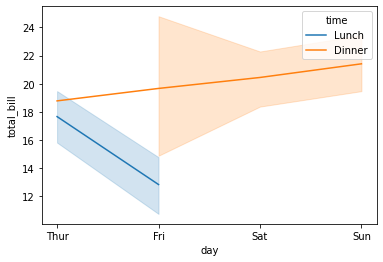

In [34]:
sns.lineplot(data=df, x='day', y='total_bill', estimator='mean', hue='time')

In [39]:
df[df['time'] == 'Lunch']['day'].unique()

['Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

### Scatterplot

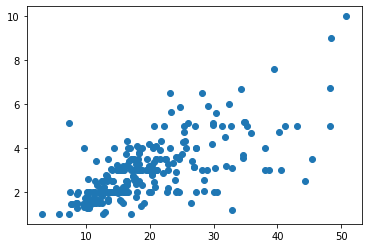

In [40]:
# Eixo x: total_bill
# Eixo y: tip

plt.scatter(df['total_bill'], df['tip'])

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

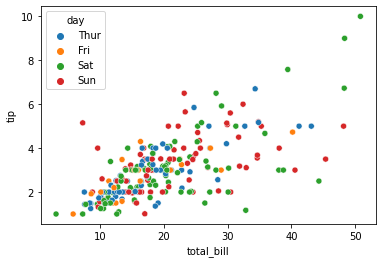

In [42]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day')

### Barplot

In [47]:
df_agrupado_por_dia

,day,total_bill,tip,size
0,Thur,17.682742,2.771452,2.451613
1,Fri,17.151579,2.734737,2.105263
2,Sat,20.441379,2.993103,2.517241
3,Sun,21.410000,3.255132,2.842105


<BarContainer object of 4 artists>

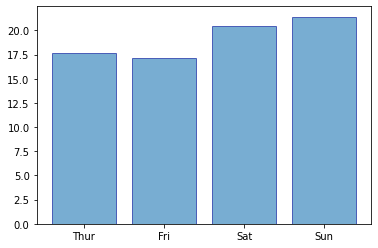

In [53]:
plt.bar(df_agrupado_por_dia['day'], df_agrupado_por_dia['total_bill'], alpha=0.6, edgecolor='#019')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

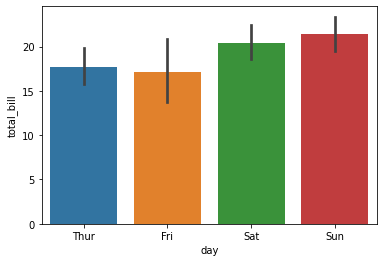

In [54]:
sns.barplot(data=df, x='day', y='total_bill')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

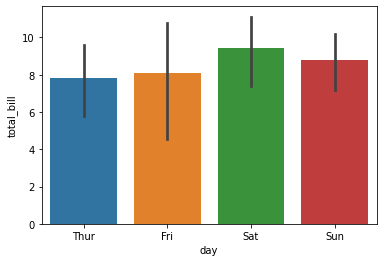

In [55]:
sns.barplot(data=df, x='day', y='total_bill', estimator=np.std)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

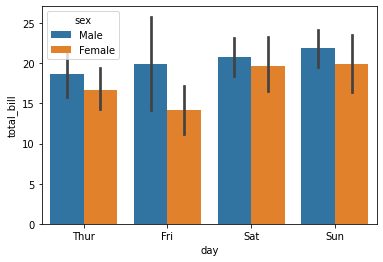

In [56]:
sns.barplot(data=df, x='day', y='total_bill', estimator=np.mean, hue='sex')

## 1. Gráfico de Distribuição
---

### 1.1. `displot` ou `histplot`

<AxesSubplot:xlabel='total_bill', ylabel='Probability'>

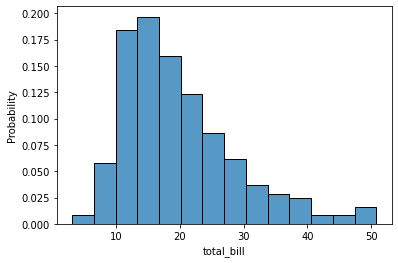

In [62]:
sns.histplot(df['total_bill'], bins='auto', stat='probability')

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

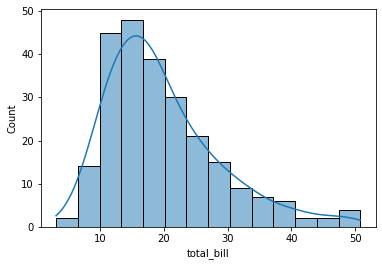

In [66]:
sns.histplot(data=df, x='total_bill', kde=True)

<AxesSubplot:xlabel='day', ylabel='Count'>

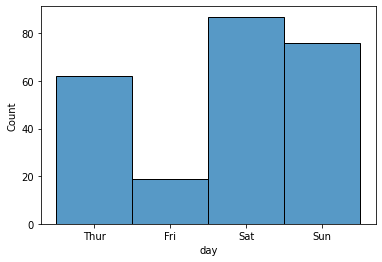

In [67]:
sns.histplot(df['day'])

<AxesSubplot:xlabel='sex', ylabel='Count'>

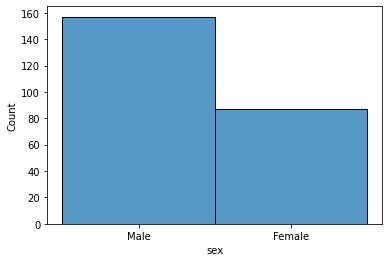

In [68]:
sns.histplot(df['sex'])

### 1.2. `jointplot`

jointplot() permite combinar basicamente dois histplot() para dados bivariados. Podemos visualizar os dados das seguintes formas (usando o **kind**):
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

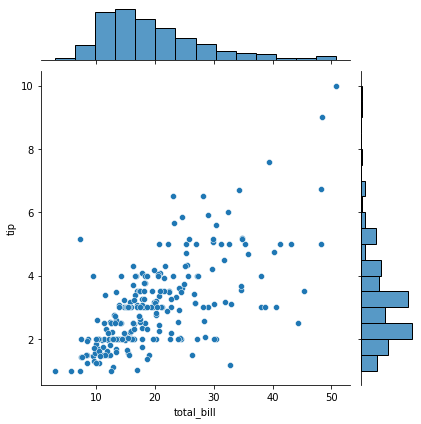

In [76]:
sns.jointplot(data=df, x='total_bill', y='tip', kind='scatter')

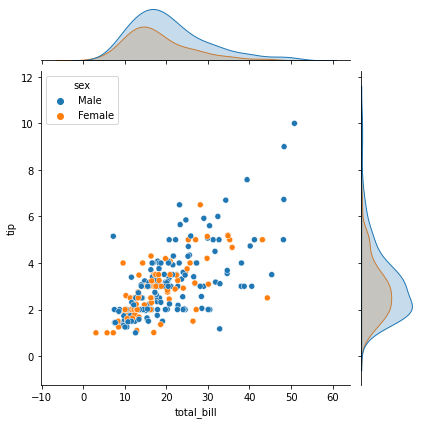

In [72]:
sns.jointplot(data=df, x='total_bill', y='tip', kind='scatter', hue='sex')

### 1.3. `pairplot`

O `pairplot` irá traçar distribuições entre pares em todo o DataFrame (para as colunas numéricas) e suporta um argumento de matiz de cor (para colunas categóricas).

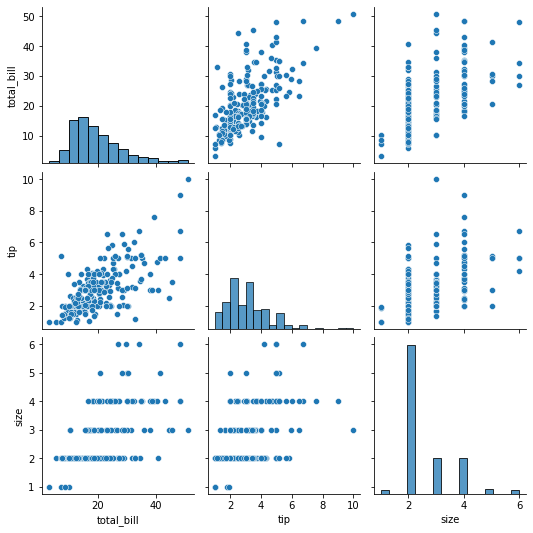

In [77]:
sns.pairplot(df)

In [78]:
iris = sns.load_dataset('iris')

In [79]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


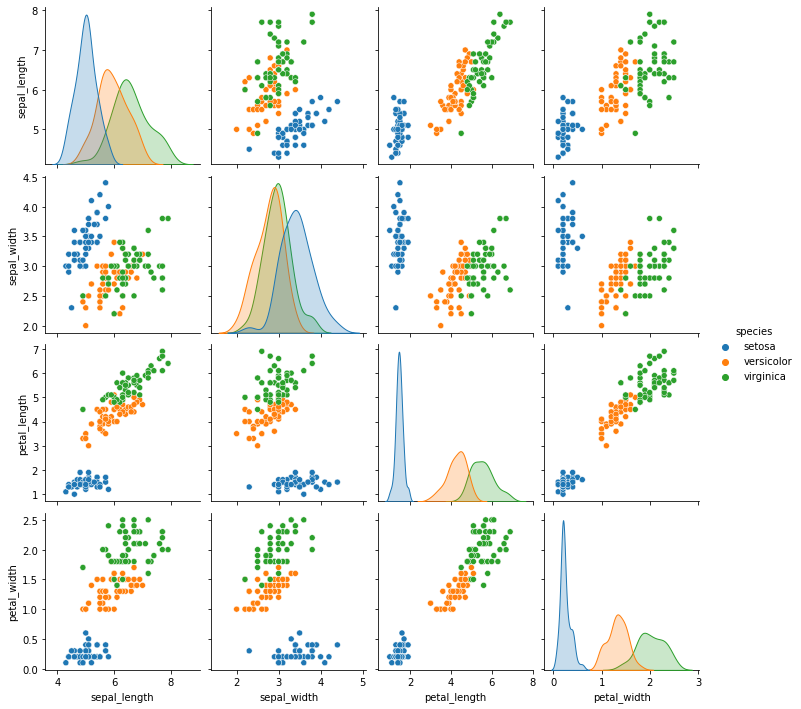

In [81]:
sns.pairplot(iris, hue='species')

### 1.4. `lmplot`

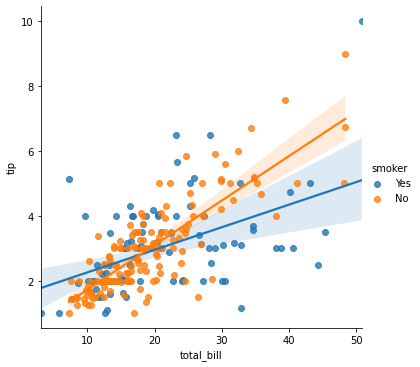

In [83]:
sns.lmplot(data=df, x='total_bill', y='tip', hue='smoker')

## 2. Gráficos Categóricos
---

### 2.1. `countplot`

In [86]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='count'>

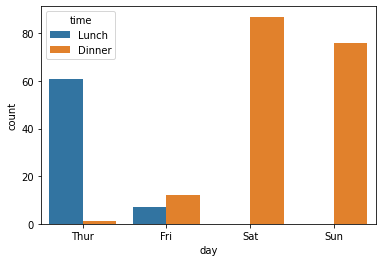

In [87]:
sns.countplot(data=df, x='day', hue='time')

### 2.2. `barplot`

### 2.3. `boxplot`

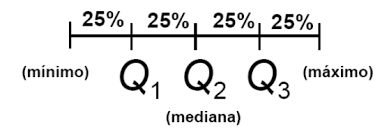

In [88]:
df['total_bill'].quantile(q=0.25)

13.3475

In [89]:
df['total_bill'].quantile(q=0.5)

17.795

In [90]:
df['total_bill'].quantile(q=0.75)

24.127499999999998

### Intervalo Interquartílico

$$
l_{inf} = Q_1 - 1,5\cdot IQR
$$

$$
l_{sup} = Q_3 + 1,5\cdot IQR
$$

em que,

$$
IQR = Q_3 - Q_1
$$

<AxesSubplot:xlabel='total_bill'>

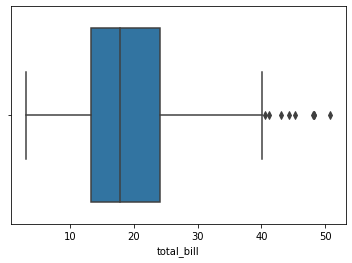

In [91]:
sns.boxplot(data=df, x='total_bill')

In [94]:
Q1 = df['total_bill'].quantile(q=0.25)
Q3 = df['total_bill'].quantile(q=0.75)

IQR = Q3 - Q1

limite_inferior = max(df['total_bill'].min(), Q1 - (1.5 * IQR))
limite_superior = Q3 + (1.5 * IQR)

print(limite_inferior, limite_superior)

3.07 40.29749999999999


In [96]:
df_filtrado = df[df['total_bill'] < limite_superior]

In [97]:
df_filtrado

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='total_bill'>

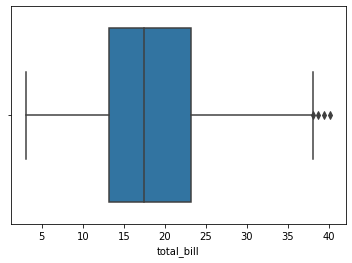

In [99]:
sns.boxplot(data=df_filtrado, x='total_bill')

## 3. Gráficos de Matriz
---

### 3.1. Heatmap

> Mapa de cores: [Documentação](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

In [101]:
matriz = np.random.randint(1, 101, (20, 20))

matriz.shape

(20, 20)

In [107]:
matriz[0]

array([60, 42, 62, 64, 44, 40, 41, 56, 62, 20, 89, 80,  7, 43, 61, 55, 39,
        4, 10, 47])

<AxesSubplot:>

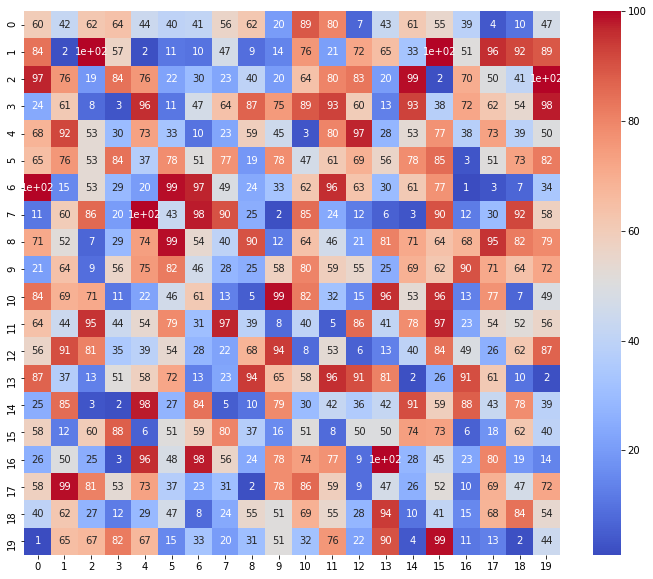

In [106]:
plt.figure(figsize=(12, 10))

sns.heatmap(matriz, cmap='coolwarm', annot=True)

In [108]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [109]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

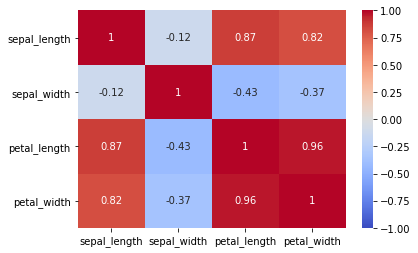

In [113]:
sns.heatmap(iris.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

## Plotly

A biblioteca Plotly é uma biblioteca do Python de plotagem interativa e de código aberto que oferece suporte a mais de 40 tipos de gráficos exclusivos, cobrindo uma ampla variedade de casos de uso estatísticos, financeiros, geográficos, científicos e tridimensionais.

Construído sobre a biblioteca Plotly JavaScript (plotly.js), o plotly permite que os usuários Python criem belas visualizações interativas baseadas na web que podem ser exibidas em blocos de anotações Jupyter, salvas em arquivos HTML autônomos ou servidas como parte da web puramente construída em Python aplicativos usando o Dash. A biblioteca Plotly do Python é às vezes chamada de "plotly.py" para diferenciá-la da biblioteca JavaScript.

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/4f93ab61-2342-4cfe-af1b-1de1a7e87ff4.gif" alt="Plotly examples" style="display: block; margin: 2rem auto; max-width: 700px" />